# 크라우드 펀딩

* 크라우드 펀딩이란

개인 / 단체 / 기업의 프로젝트의 자금 조달 수단 중 하나

크라우드 펀딩을 통한 다수의 투자자로부터 프로젝트를 수행하기 위한 금액을 모금하는 방식



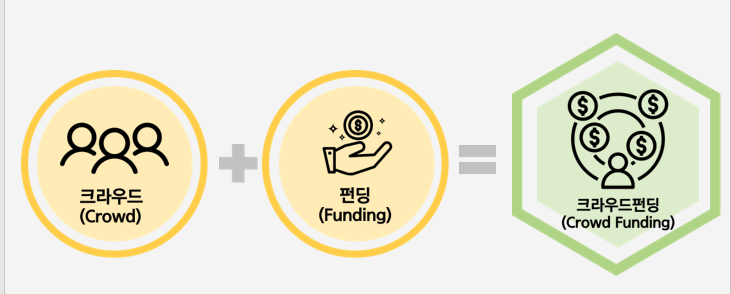

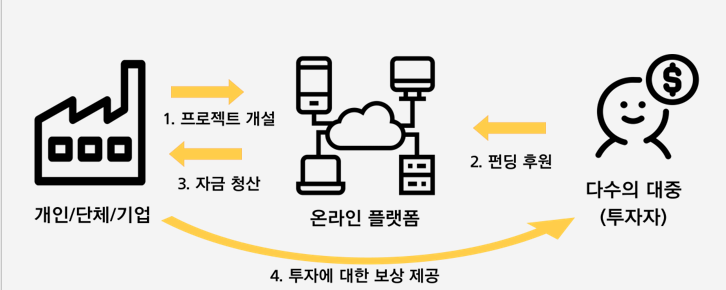

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [ ]:
# 그래프 한글 폰트

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
plt.rcParams['font.family'] = "NanumGothic"

In [ ]:
# 모든 행을 출력
pd.set_option('display.max_columns', None)

코드 출처 : https://www.crowdnet.or.kr/funding_info_archive/funding_info.jsp

In [ ]:
train = pd.read_csv('crowd_funding_data.csv')
train.head()

,기업명,상태,기업소개,증권구분,모집가액,청약금액,발행금액,발행일,업종,청약률,청약자수,중개업자,임직원수,자산총계,부채총계,자본총계,자본금,매출액,영업이익,당기순이익
0,제이알디웍스,종료,㈜제이알디웍스는 ICT기술과 돌봄 홈서비스가 접목된 스마트 홈조리원 서비스 똑똑 및...,주식,"30,000,000",0,0,2023-01-06,IT·영상,0%,0,오마이컴퍼니,3,"667,403,404","663,320,929","4,082,475","56,425,000","500,330,023","-169,880,133","-95,110,634"
1,알에프디바이스,성공,이동통신 소재부품에서 시스템까지 개발 / 생산하는 전문기업,주식,"300,000,000","244,000,000",0,2023-01-05,제조,81%,57,아시아크라우드펀딩,10,"5,189,335,052","3,386,857,967","1,802,477,085","500,000,000","1,828,302,051","19,365,938","188,108,741"
2,케이에이치트레이더스,성공,"케이에이치트레이더스는 보유한 해외 네트워크를 기반으로 태그호이어, 오메가 등 명품시...",채권,"14,637,000","20,090,000",0,2022-12-28,도소매,137%,5,크라우디,6,"45,669,672","766,360","44,903,312","50,000,000",NaN,"-5,107,400","-5,096,688"
3,코지샵,성공,당사는 커튼 및 블라인드를 개발하여 제조/판매하는 회사입니다.,채권,"180,015,000","195,910,000","180,015,000",2022-12-27,도소매,109%,56,펀딩포유,15,"3,608,237,354","2,522,518,695","1,085,718,659","763,500,000","3,063,424,142","174,189,912","97,122,462"
4,힘난다,성공,"힘난다'는 맛있는 음식을 통해 사람들에게 건강한 에너지를 제공하는, 푸드테크 프랜차...",채권,"50,000,000","50,000,000","50,000,000",2022-12-23,제조,100%,22,크라우디,10,"3,799,285,037","1,763,740,760","2,035,544,277","640,089,000","4,060,548,239","-276,663,987","-86,153,117"


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기업명     1528 non-null   object
 1   상태      1528 non-null   object
 2   기업소개    1528 non-null   object
 3   증권구분    1528 non-null   object
 4   모집가액    1528 non-null   object
 5   청약금액    1528 non-null   object
 6   발행금액    1528 non-null   object
 7   발행일     1528 non-null   object
 8   업종      1528 non-null   object
 9   청약률     1528 non-null   object
 10  청약자수    1528 non-null   object
 11  중개업자    1528 non-null   object
 12  임직원수    1528 non-null   int64 
 13  자산총계    984 non-null    object
 14  부채총계    968 non-null    object
 15  자본총계    984 non-null    object
 16  자본금     989 non-null    object
 17  매출액     886 non-null    object
 18  영업이익    963 non-null    object
 19  당기순이익   967 non-null    object
dtypes: int64(1), object(19)
memory usage: 238.9+ KB


In [ ]:
train['발행일'] = pd.to_datetime(train['발행일'])

In [ ]:
train['년도'] = train['발행일'].dt.year

In [ ]:
train['월'] = train['발행일'].dt.month

In [ ]:
train['모집가액'] = train['모집가액'].str.replace(',','')
train['청약금액'] = train['청약금액'].str.replace(',','')
train['청약률'] = train['청약률'].str.replace('%','')
train["자산총계"] = train["자산총계"].str.replace(',','')
train["부채총계"] = train["부채총계"].str.replace(',','')
train["자본총계"] = train["자본총계"].str.replace(',','')
train["자본금"] = train["자본금"].str.replace(',','')
train["매출액"] = train["매출액"].str.replace(',','')
train["영업이익"] = train["영업이익"].str.replace(',','')
train["당기순이익"] = train["당기순이익"].str.replace(',','')
train.head()

,기업명,상태,기업소개,증권구분,모집가액,청약금액,발행금액,발행일,업종,청약률,청약자수,중개업자,임직원수,자산총계,부채총계,자본총계,자본금,매출액,영업이익,당기순이익,년도,월
0,제이알디웍스,종료,㈜제이알디웍스는 ICT기술과 돌봄 홈서비스가 접목된 스마트 홈조리원 서비스 똑똑 및...,주식,30000000,0,0,2023-01-06,IT·영상,0,0,오마이컴퍼니,3,667403404,663320929,4082475,56425000,500330023,-169880133,-95110634,2023,1
1,알에프디바이스,성공,이동통신 소재부품에서 시스템까지 개발 / 생산하는 전문기업,주식,300000000,244000000,0,2023-01-05,제조,81,57,아시아크라우드펀딩,10,5189335052,3386857967,1802477085,500000000,1828302051,19365938,188108741,2023,1
2,케이에이치트레이더스,성공,"케이에이치트레이더스는 보유한 해외 네트워크를 기반으로 태그호이어, 오메가 등 명품시...",채권,14637000,20090000,0,2022-12-28,도소매,137,5,크라우디,6,45669672,766360,44903312,50000000,NaN,-5107400,-5096688,2022,12
3,코지샵,성공,당사는 커튼 및 블라인드를 개발하여 제조/판매하는 회사입니다.,채권,180015000,195910000,"180,015,000",2022-12-27,도소매,109,56,펀딩포유,15,3608237354,2522518695,1085718659,763500000,3063424142,174189912,97122462,2022,12
4,힘난다,성공,"힘난다'는 맛있는 음식을 통해 사람들에게 건강한 에너지를 제공하는, 푸드테크 프랜차...",채권,50000000,50000000,"50,000,000",2022-12-23,제조,100,22,크라우디,10,3799285037,1763740760,2035544277,640089000,4060548239,-276663987,-86153117,2022,12


In [ ]:
train.isnull().sum() # 나중에 삭제

기업명        0
상태         0
기업소개       0
증권구분       0
모집가액       0
청약금액       0
발행금액       0
발행일        0
업종         0
청약률        0
청약자수       0
중개업자       0
임직원수       0
자산총계     544
부채총계     560
자본총계     544
자본금      539
매출액      642
영업이익     565
당기순이익    561
년도         0
월          0
dtype: int64

In [ ]:
train = train.fillna(0)

In [ ]:
train.isnull().sum() # 금액이 없는 것 = 0

기업명      0
상태       0
기업소개     0
증권구분     0
모집가액     0
청약금액     0
발행금액     0
발행일      0
업종       0
청약률      0
청약자수     0
중개업자     0
임직원수     0
자산총계     0
부채총계     0
자본총계     0
자본금      0
매출액      0
영업이익     0
당기순이익    0
년도       0
월        0
dtype: int64

In [ ]:
train['모집가액'] = train['모집가액'].astype(int)
train['청약금액'] = train['청약금액'].astype(int)
train['청약률'] = train['청약률'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기업명     1528 non-null   object        
 1   상태      1528 non-null   object        
 2   기업소개    1528 non-null   object        
 3   증권구분    1528 non-null   object        
 4   모집가액    1528 non-null   int64         
 5   청약금액    1528 non-null   int64         
 6   발행금액    1528 non-null   object        
 7   발행일     1528 non-null   datetime64[ns]
 8   업종      1528 non-null   object        
 9   청약률     1528 non-null   int64         
 10  청약자수    1528 non-null   object        
 11  중개업자    1528 non-null   object        
 12  임직원수    1528 non-null   int64         
 13  자산총계    1528 non-null   object        
 14  부채총계    1528 non-null   object        
 15  자본총계    1528 non-null   object        
 16  자본금     1528 non-null   object        
 17  매출액     1528 non-null   object        
 18  영업이익    

In [ ]:
train.describe()

,모집가액,청약금액,청약률,임직원수,년도,월
count,1.528000e+03,1.528000e+03,1528.000000,1528.000000,1528.000000,1528.000000
mean,1.510187e+08,1.222339e+08,71.214005,10.565445,2018.520942,6.537958
std,1.616418e+08,1.907238e+08,51.632619,18.612786,1.733625,3.628617
min,1.000000e+06,0.000000e+00,0.000000,0.000000,2016.000000,1.000000
25%,5.000000e+07,9.454500e+06,14.000000,3.000000,2017.000000,3.000000
50%,1.000000e+08,5.228450e+07,90.000000,6.000000,2018.000000,7.000000
75%,2.000000e+08,1.482150e+08,102.000000,11.000000,2020.000000,10.000000
max,1.499913e+09,2.521740e+09,482.000000,300.000000,2023.000000,12.000000


In [ ]:
train.columns

Index(['기업명', '상태', '기업소개', '증권구분', '모집가액', '청약금액', '발행금액', '발행일', '업종', '청약률',
       '청약자수', '중개업자', '임직원수', '자산총계', '부채총계', '자본총계', '자본금', '매출액', '영업이익',
       '당기순이익', '년도', '월'],
      dtype='object')

In [ ]:
train['업종'].value_counts()

제조       507
IT·영상    464
기타       175
도소매      156
전문기술      81
예술·여가     67
교육        39
농수산       26
금융        13
Name: 업종, dtype: int64

In [ ]:
train['중개업자'].value_counts()

와디즈파이낸스      723
오픈트레이드       164
오마이컴퍼니       133
크라우디         132
펀딩포유          68
IBK투자증권       63
코리아에셋투자증권     58
펀더풀           39
인크            25
유진투자증권        21
아시아크라우드펀딩     19
KTB투자증권       17
우리종합금융        14
이안프론티어        12
네오스프링         10
키움증권           8
유캔스타트          8
한국크라우드투자       5
엑스퀘어           5
신화웰스펀딩         4
Name: 중개업자, dtype: int64

In [ ]:
train['증권구분'].value_counts()

주식    1069
채권     459
Name: 증권구분, dtype: int64

In [ ]:
train['상태'].value_counts()

성공    976
종료    552
Name: 상태, dtype: int64

In [ ]:
# 성공 데이터 셋
train_win = train[train['상태'] == '성공']

In [ ]:
# 종료(실패) 데이터 셋
train_lose = train[train['상태'] == '종료']

In [ ]:
train_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 1 to 1527
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기업명     976 non-null    object        
 1   상태      976 non-null    object        
 2   기업소개    976 non-null    object        
 3   증권구분    976 non-null    object        
 4   모집가액    976 non-null    int64         
 5   청약금액    976 non-null    int64         
 6   발행금액    976 non-null    object        
 7   발행일     976 non-null    datetime64[ns]
 8   업종      976 non-null    object        
 9   청약률     976 non-null    int64         
 10  청약자수    976 non-null    object        
 11  중개업자    976 non-null    object        
 12  임직원수    976 non-null    int64         
 13  자산총계    976 non-null    object        
 14  부채총계    976 non-null    object        
 15  자본총계    976 non-null    object        
 16  자본금     976 non-null    object        
 17  매출액     976 non-null    object        
 18  영업이익    9

In [ ]:
train_win['년도'].value_counts()

2019    195
2018    190
2017    172
2020    137
2016    106
2021     90
2022     85
2023      1
Name: 년도, dtype: int64

In [ ]:
train_win.head()

,기업명,상태,기업소개,증권구분,모집가액,청약금액,발행금액,발행일,업종,청약률,청약자수,중개업자,임직원수,자산총계,부채총계,자본총계,자본금,매출액,영업이익,당기순이익,년도,월
1,알에프디바이스,성공,이동통신 소재부품에서 시스템까지 개발 / 생산하는 전문기업,주식,300000000,244000000,0,2023-01-05,제조,81,57,아시아크라우드펀딩,10,5189335052,3386857967,1802477085,500000000,1828302051,19365938,188108741,2023,1
2,케이에이치트레이더스,성공,"케이에이치트레이더스는 보유한 해외 네트워크를 기반으로 태그호이어, 오메가 등 명품시...",채권,14637000,20090000,0,2022-12-28,도소매,137,5,크라우디,6,45669672,766360,44903312,50000000,0,-5107400,-5096688,2022,12
3,코지샵,성공,당사는 커튼 및 블라인드를 개발하여 제조/판매하는 회사입니다.,채권,180015000,195910000,"180,015,000",2022-12-27,도소매,109,56,펀딩포유,15,3608237354,2522518695,1085718659,763500000,3063424142,174189912,97122462,2022,12
4,힘난다,성공,"힘난다'는 맛있는 음식을 통해 사람들에게 건강한 에너지를 제공하는, 푸드테크 프랜차...",채권,50000000,50000000,"50,000,000",2022-12-23,제조,100,22,크라우디,10,3799285037,1763740760,2035544277,640089000,4060548239,-276663987,-86153117,2022,12
5,네오에스티지,성공,"다양한 공간에 꼭 필요한 공기살균청정 솔루션을 제공하고 있으며, 공기살균청정 브랜드...",채권,130000000,139320000,"130,000,000",2022-12-16,제조,107,59,펀딩포유,6,1301292925,908046470,393246455,1400000000,176245764,-246809162,-234645435,2022,12


* 크라우드 펀딩의 개수는 2016년 부터 증가하는 추세 > 2020년 이후로 감소하는 추세

* 감소하는 이유 : 펀딩 후 횡령, 프로젝트 진행 취소 대한 대책 부족으로 투자자의 위험성이 커짐

In [ ]:
# 그래프 유틸 함수
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), rotation=45):
    plt.rc('font', family = 'NanumGothic')
    plot = df.plot(kind='bar', figsize=figsize, color='#e35f62')
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

# plot_bar(num_screening_rat, 'screening_rat', 'box_off_num', 'num_screening_rat')

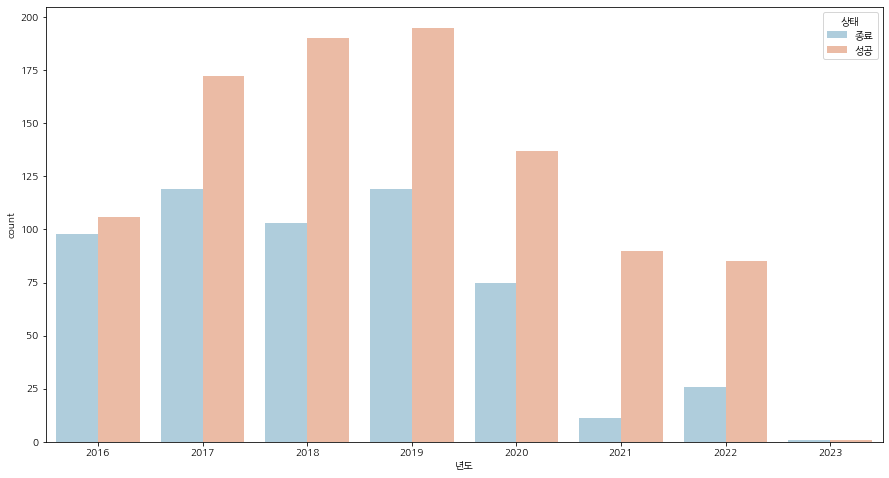

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x='년도',hue='상태',data = train, palette = 'RdBu_r') 

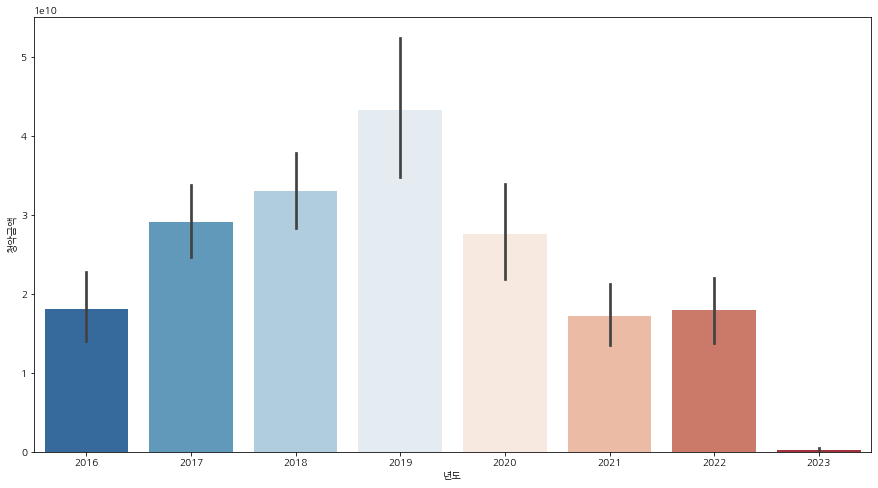

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x= '년도',y= '청약금액',data = train, estimator = np.sum, palette = 'RdBu_r') # 전체 금액

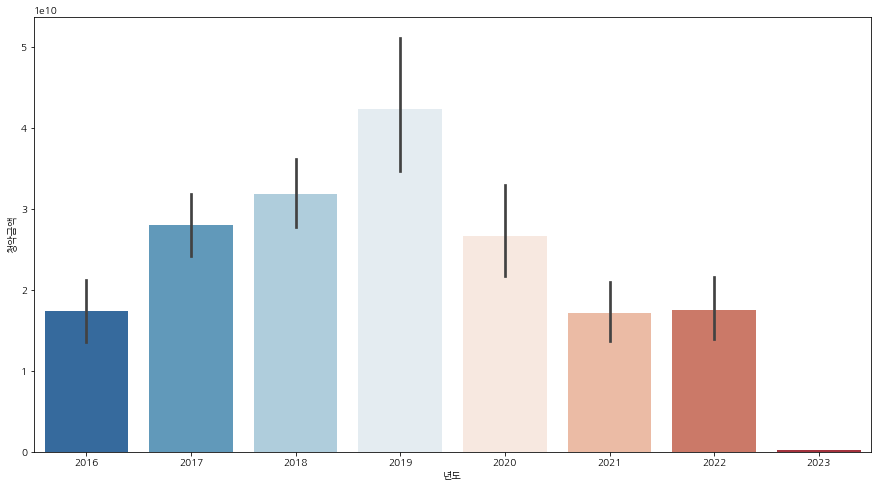

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x= '년도',y= '청약금액',data = train_win, estimator = np.sum, palette = 'RdBu_r') # 전체 금액

펀딩 성공 총 금액 : 150억 정도 규모

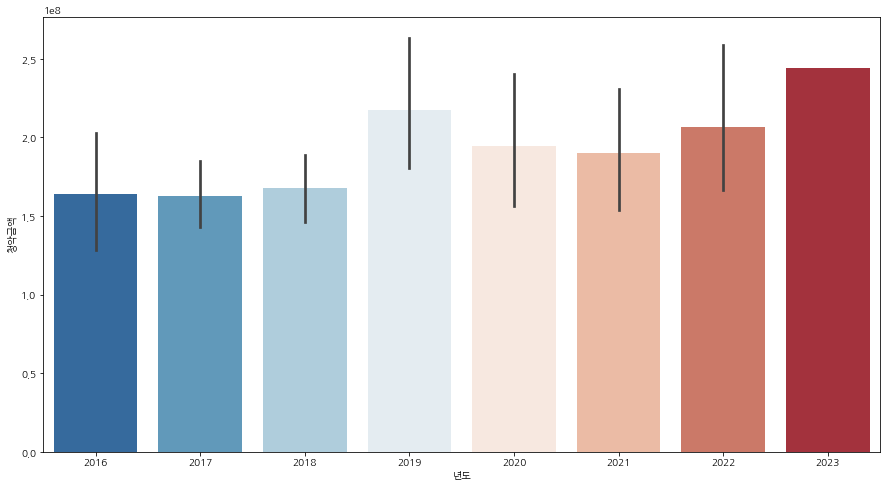

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x= '년도',y= '청약금액',data = train_win, estimator = np.mean, palette = 'RdBu_r') # 평균 금액

* 펀딩 성공 금액은 평균 2억

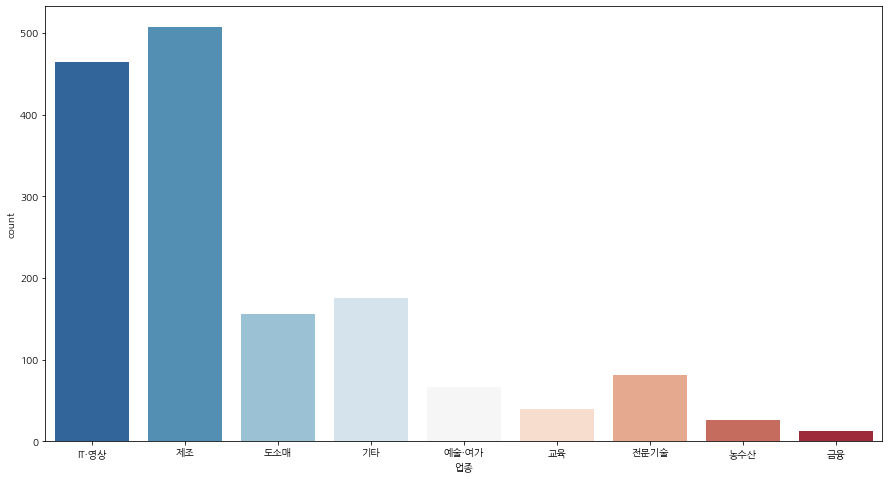

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x='업종',data = train, palette = 'RdBu_r') 

* 펀딩 진행 업종 : IT,영상 / 제조 분야가 대부분 
* 진행 업종이 많다고 해서 성공 횟수가 많은 건 아니다.

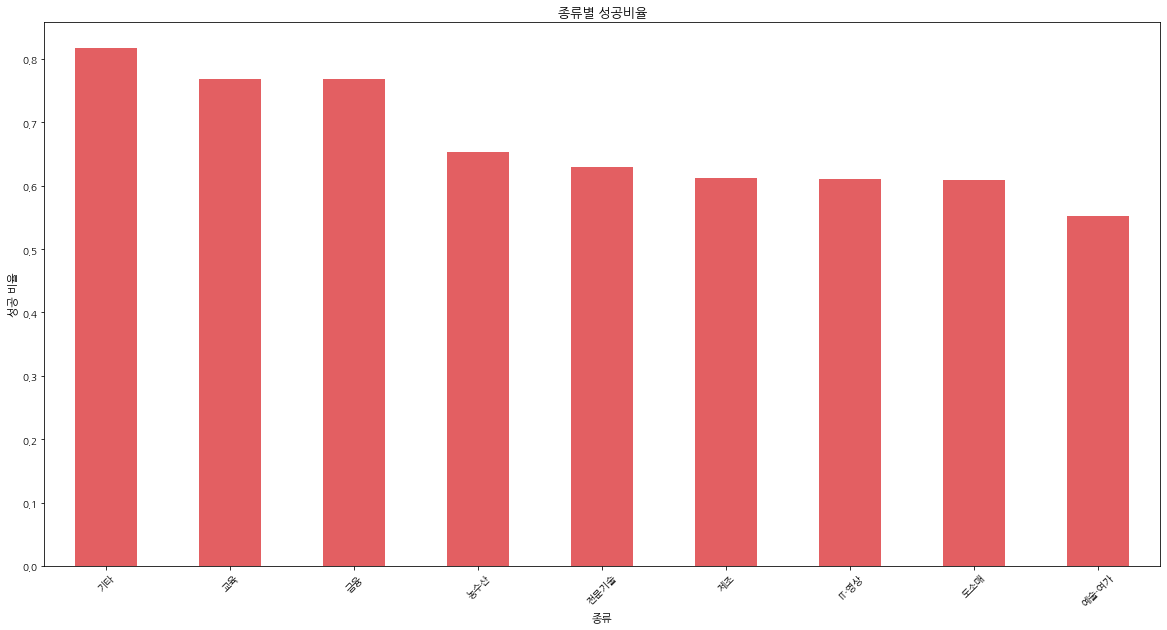

In [ ]:
train_percent = train_win.groupby('업종').count()['상태'].sort_values(ascending = False) / train.groupby('업종').count()['상태'].sort_values(ascending = False) 
train_percent = train_percent.sort_values(ascending = False)
plot_bar(train_percent, '종류', '성공 비율', '종류별 성공비율')

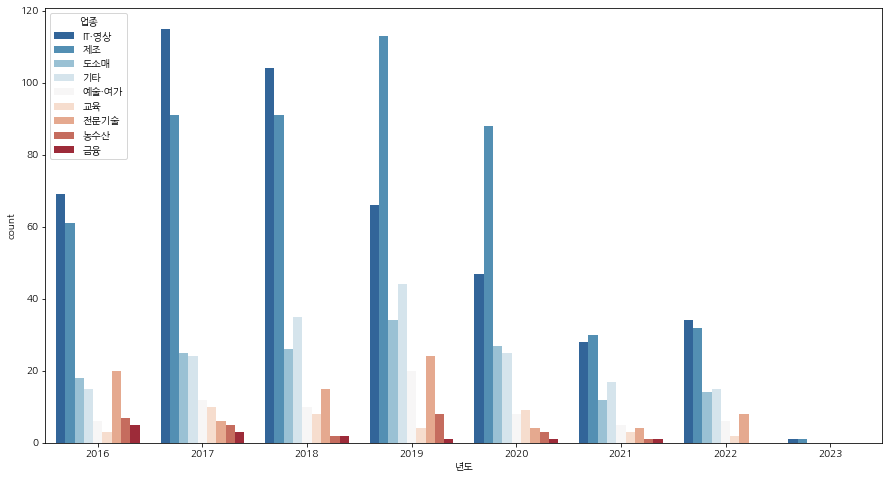

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x='년도',hue='업종',data = train, palette = 'RdBu_r') 

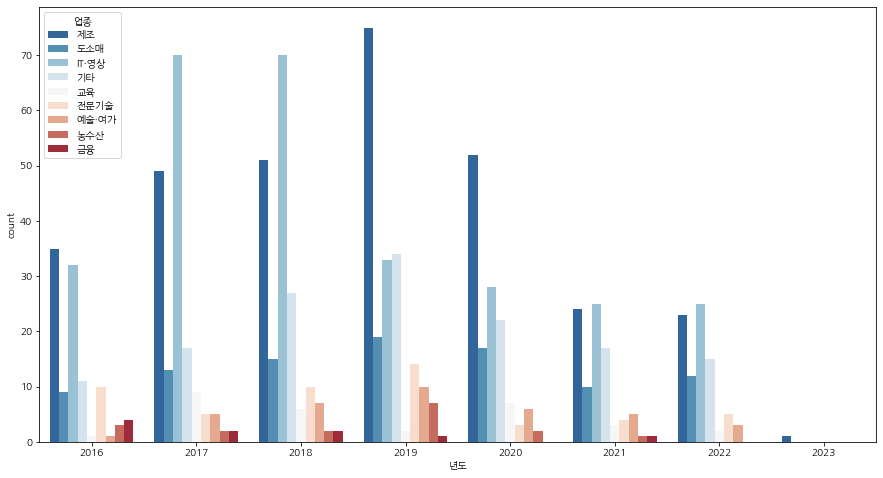

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x='년도',hue ='업종',data = train_win, palette = 'RdBu_r') 

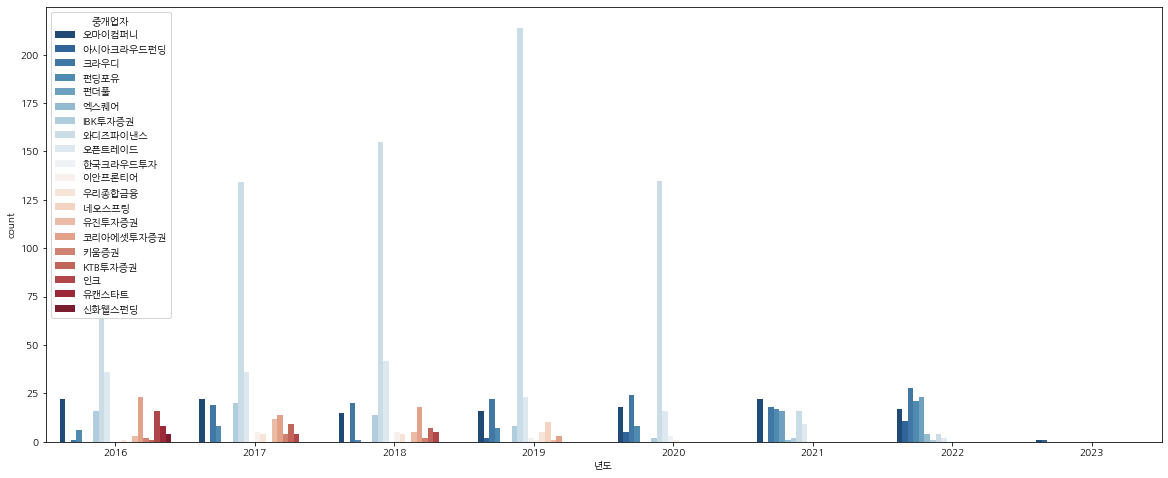

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x='년도',hue ='중개업자',data = train, palette = 'RdBu_r') 

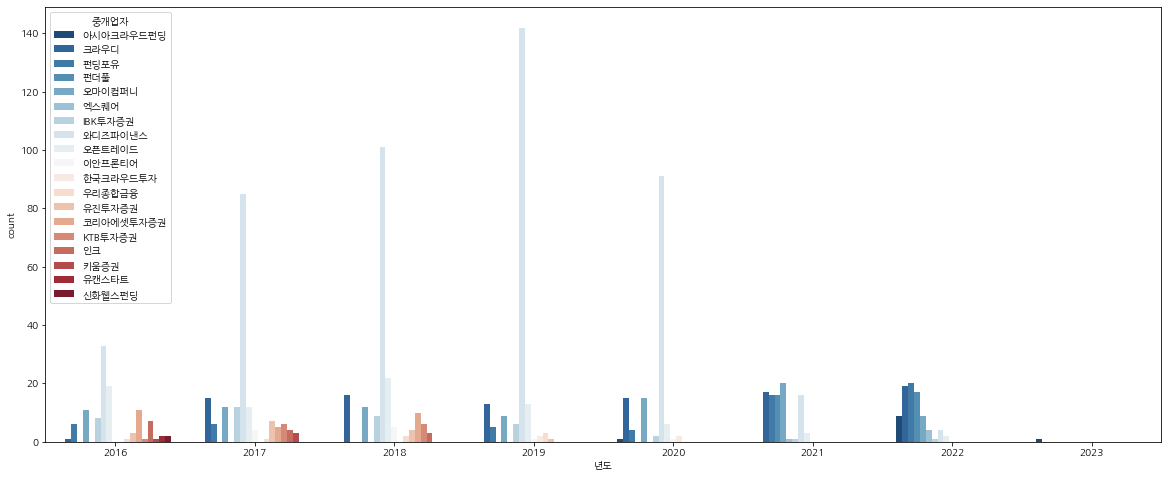

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x='년도',hue ='중개업자',data = train_win, palette = 'RdBu_r') 

* 와디즈에서 대부분의 펀딩이 진행

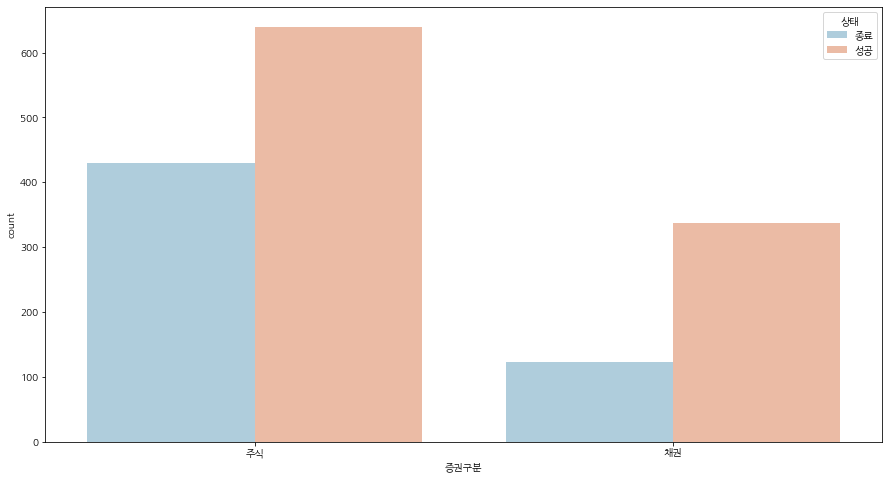

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x='증권구분', hue = '상태',data = train, palette = 'RdBu_r') 

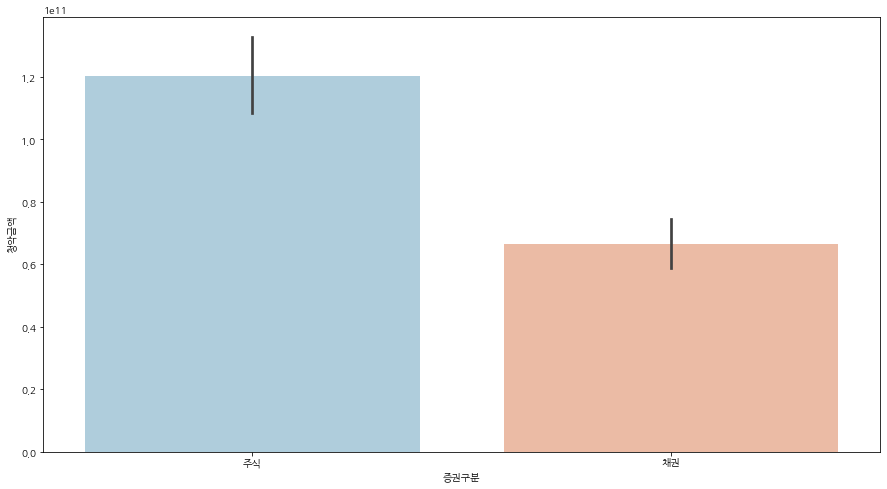

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x= '증권구분',y= '청약금액',data = train, estimator = np.sum, palette = 'RdBu_r') # 합계 금액

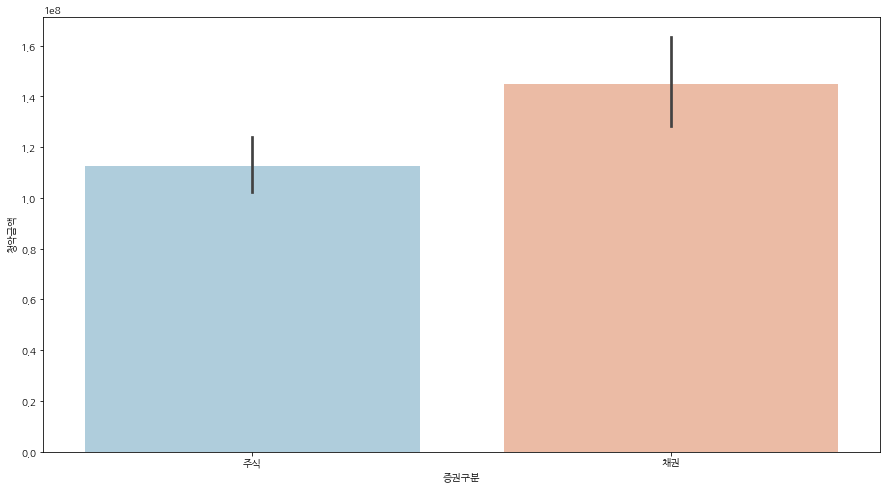

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x= '증권구분',y= '청약금액',data = train, estimator = np.mean, palette = 'RdBu_r') # 평균 금액

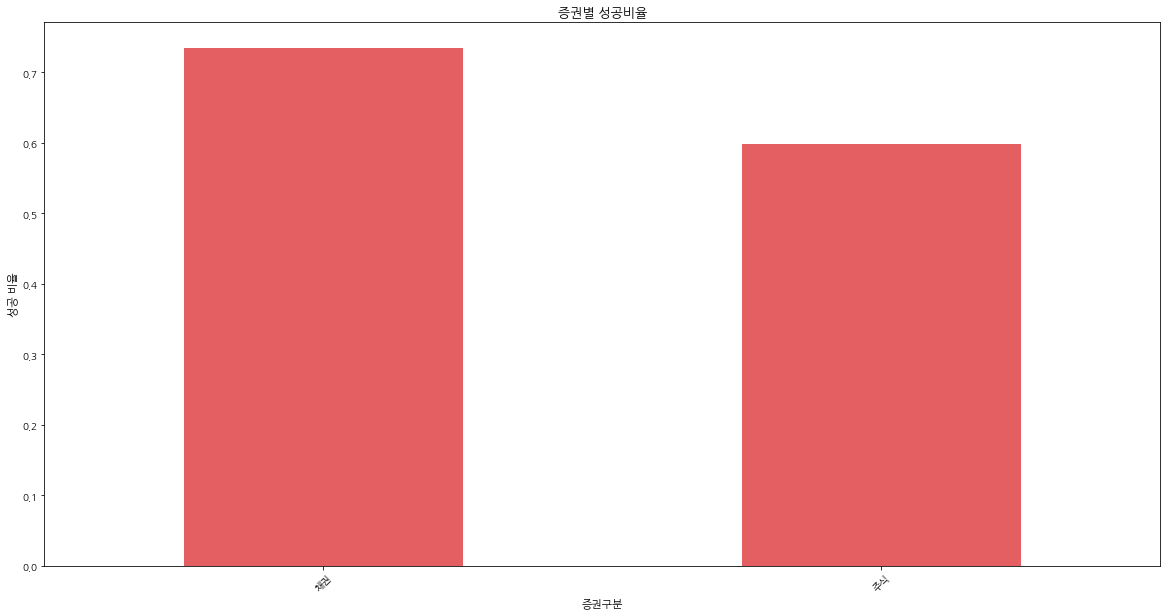

In [ ]:
train_percent_fund = train_win.groupby('증권구분').count()['상태'].sort_values(ascending = False) / train.groupby('증권구분').count()['상태'].sort_values(ascending = False) 
train_percent_fund = train_percent_fund.sort_values(ascending = False)
plot_bar(train_percent_fund, '증권구분', '성공 비율', '증권별 성공비율')

* 주식형 펀딩이 많은 것을 볼 수 있지만, 성공률에서는 채권형 펀딩이 높은 것을 볼 수 있다. 또한, 채권형 펀딩에 있어서 청약금액이 높은 것을 볼 수 있다.

In [ ]:
len(train_win[train_win['청약률'] > 100]) / len(train_win)

0.4764344262295082

* 펀딩이 성공한 경우에 모집가액만큼 청약금액이 모이지 않아도 성공하는 경우가 53%이다.

## 성공 및 실패의 기업 소개 텍스터마이닝

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy wordcloud

In [ ]:
import json
import re
from bs4 import BeautifulSoup
import warnings # 그래프시 Waring 안뜨게 하는 방식
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

In [ ]:
train_win_intro = train_win['기업소개']
train_lose_intro = train_lose['기업소개']
train_lose_intro.head()

0     ㈜제이알디웍스는 ICT기술과 돌봄 홈서비스가 접목된 스마트 홈조리원 서비스 똑똑 및...
7                    영화 <유령> 프로젝트 투자 모집을 위한 특수목적 법인입니다.
13    카카오프렌즈, 무민 IP 라이선스 계약을 통한 테마파크 구축, 콘텐츠 제작 등 캐릭...
22               영화 <데시벨>의 프로젝트 투자를 위해 설립된 특수 목적 법인입니다.
28                뮤지컬 <드라큘라> 프로젝트 투자 모집을 위한 특수목적 법인입니다.
Name: 기업소개, dtype: object

In [ ]:
train_win_intro = train_win_intro.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))
train_lose_intro = train_lose_intro.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))

In [ ]:
train_win_intro[:10]

1                       이동통신 소재부품에서 시스템까지 개발  생산하는 전문기업
2     케이에이치트레이더스는 보유한 해외 네트워크를 기반으로 태그호이어 오메가 등 명품시계...
3                     당사는 커튼 및 블라인드를 개발하여 제조판매하는 회사입니다 
4     힘난다는 맛있는 음식을 통해 사람들에게 건강한 에너지를 제공하는 푸드테크 프랜차이즈...
5     다양한 공간에 꼭 필요한 공기살균청정 솔루션을 제공하고 있으며 공기살균청정 브랜드네...
6     어니스트초이스는 육가공 산업 및 한우 전문분야의 노하우와  혁신기술을 기반으로 부가...
8     주팀스토리는 국내외 유명 기관과 기업에서 찾는 혁신적이고미래지향적 메타버스 플랫폼 ...
9                                         국내 캠핑 정보 플랫폼 
10    샐리쿡은 암식이상담연구소와 푸드테크연구소의 집중연구로 연구 논문 특허 인증을 받은 ...
11    프라우들리는 한국 전통의 공간이 한옥을 세련된 공간으로 바꾸고 있습니다 전통적인 숙...
Name: 기업소개, dtype: object

In [ ]:
train_lose_intro[:10]

0     제이알디웍스는 기술과 돌봄 홈서비스가 접목된 스마트 홈조리원 서비스 똑똑 및 플랫폼...
7                       영화 유령 프로젝트 투자 모집을 위한 특수목적 법인입니다
13    카카오프렌즈 무민  라이선스 계약을 통한 테마파크 구축 콘텐츠 제작 등 캐릭터  사...
22                  영화 데시벨의 프로젝트 투자를 위해 설립된 특수 목적 법인입니다
28                   뮤지컬 드라큘라 프로젝트 투자 모집을 위한 특수목적 법인입니다
31    주식회사 초송은 낚시와 캠핑을 즐겨하는 사람들특히 일교차가 심한 봄가을캠핑 중 추위...
32                         머물고 싶은 좋은 스테이를 큐레이팅하는 스테이폴리오
33    주식회사 일학교는 대한민국 최대 규모의 오픈마켓 비트 커머스 플랫폼 제이원비츠를 운...
34                      영화 유령 프로젝트 투자 모집을 위한 특수목적 법인입니다
37    정광스틸은 건설사로 부터 철근가공 의뢰를 받아 공장에서 절단가공하여 건설현장으로 납...
Name: 기업소개, dtype: object

In [ ]:
win_tagger = Twitter()
lose_tagger = Twitter()

In [ ]:
def get_word_lose_rating(sentence):
    nouns = lose_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

def get_word_win_rating(sentence):
    nouns = win_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

In [ ]:
lose_countvector = CountVectorizer(tokenizer=get_word_lose_rating, max_features=300)
lose_tdf = lose_countvector.fit_transform(train_lose_intro)
lose_words = lose_countvector.get_feature_names()
count_mat = lose_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
lose_rating_word_count = list(zip(lose_words, count))
lose_rating_word_count = sorted(lose_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
lose_rating_word_count[:15]

[('기업', 185),
 ('개발', 169),
 ('서비스', 136),
 ('기술', 106),
 ('제품', 95),
 ('사업', 90),
 ('제공', 87),
 ('회사', 83),
 ('플랫폼', 81),
 ('제조', 66),
 ('전문', 65),
 ('판매', 62),
 ('운영', 58),
 ('국내', 56),
 ('통해', 56)]

In [ ]:
win_countvector = CountVectorizer(tokenizer=get_word_win_rating, max_features=300)
win_tdf = win_countvector.fit_transform(train_win_intro)
win_words = win_countvector.get_feature_names()
count_mat = win_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
win_rating_word_count = list(zip(win_words, count))
win_rating_word_count = sorted(win_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
win_rating_word_count[:15]

[('개발', 309),
 ('기업', 269),
 ('서비스', 241),
 ('기술', 165),
 ('제품', 155),
 ('제공', 152),
 ('플랫폼', 149),
 ('회사', 149),
 ('사업', 148),
 ('통해', 141),
 ('판매', 128),
 ('전문', 110),
 ('기반', 103),
 ('운영', 102),
 ('제조', 97)]

In [ ]:
lose_rating_document = train_lose_intro.values
win_rating_document = train_win_intro.values

* 성공 사례의 기업소개 텍스처 마이닝

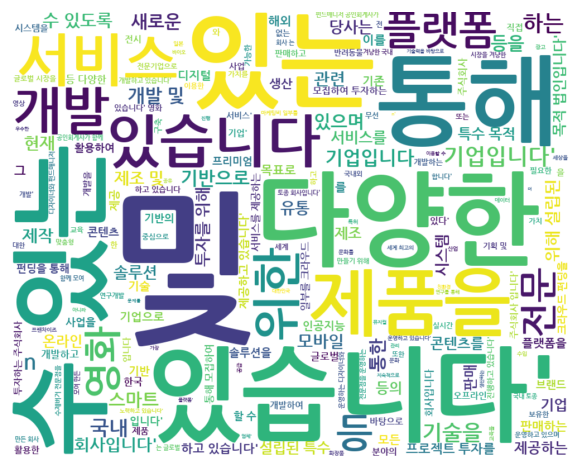

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(win_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

* 실패 사례의 텍스처 마이닝

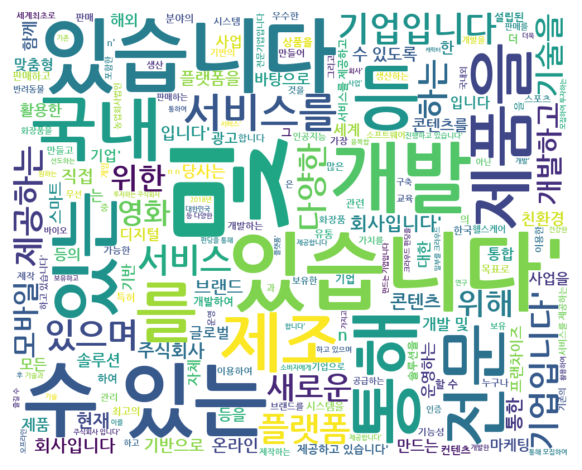

In [ ]:
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(lose_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 기업에 투자에 있어서 중요한 요소

In [ ]:
train2 = pd.read_csv('crowd_funding_data.csv')
train2.head()

,기업명,상태,기업소개,증권구분,모집가액,청약금액,발행금액,발행일,업종,청약률,청약자수,중개업자,임직원수,자산총계,부채총계,자본총계,자본금,매출액,영업이익,당기순이익
0,제이알디웍스,종료,㈜제이알디웍스는 ICT기술과 돌봄 홈서비스가 접목된 스마트 홈조리원 서비스 똑똑 및...,주식,"30,000,000",0,0,2023-01-06,IT·영상,0%,0,오마이컴퍼니,3,"667,403,404","663,320,929","4,082,475","56,425,000","500,330,023","-169,880,133","-95,110,634"
1,알에프디바이스,성공,이동통신 소재부품에서 시스템까지 개발 / 생산하는 전문기업,주식,"300,000,000","244,000,000",0,2023-01-05,제조,81%,57,아시아크라우드펀딩,10,"5,189,335,052","3,386,857,967","1,802,477,085","500,000,000","1,828,302,051","19,365,938","188,108,741"
2,케이에이치트레이더스,성공,"케이에이치트레이더스는 보유한 해외 네트워크를 기반으로 태그호이어, 오메가 등 명품시...",채권,"14,637,000","20,090,000",0,2022-12-28,도소매,137%,5,크라우디,6,"45,669,672","766,360","44,903,312","50,000,000",NaN,"-5,107,400","-5,096,688"
3,코지샵,성공,당사는 커튼 및 블라인드를 개발하여 제조/판매하는 회사입니다.,채권,"180,015,000","195,910,000","180,015,000",2022-12-27,도소매,109%,56,펀딩포유,15,"3,608,237,354","2,522,518,695","1,085,718,659","763,500,000","3,063,424,142","174,189,912","97,122,462"
4,힘난다,성공,"힘난다'는 맛있는 음식을 통해 사람들에게 건강한 에너지를 제공하는, 푸드테크 프랜차...",채권,"50,000,000","50,000,000","50,000,000",2022-12-23,제조,100%,22,크라우디,10,"3,799,285,037","1,763,740,760","2,035,544,277","640,089,000","4,060,548,239","-276,663,987","-86,153,117"


In [ ]:
train2.isnull().sum() # 결측치 확인

기업명        0
상태         0
기업소개       0
증권구분       0
모집가액       0
청약금액       0
발행금액       0
발행일        0
업종         0
청약률        0
청약자수       0
중개업자       0
임직원수       0
자산총계     544
부채총계     560
자본총계     544
자본금      539
매출액      642
영업이익     565
당기순이익    561
dtype: int64

In [ ]:
train2 = train2.dropna()

In [ ]:
train2.isnull().sum()

기업명      0
상태       0
기업소개     0
증권구분     0
모집가액     0
청약금액     0
발행금액     0
발행일      0
업종       0
청약률      0
청약자수     0
중개업자     0
임직원수     0
자산총계     0
부채총계     0
자본총계     0
자본금      0
매출액      0
영업이익     0
당기순이익    0
dtype: int64

In [ ]:
train2['모집가액'] = train2['모집가액'].str.replace(',','')
train2['청약금액'] = train2['청약금액'].str.replace(',','')
train2['청약률'] = train2['청약률'].str.replace('%','')
train2["자산총계"] = train2["자산총계"].str.replace(',','')
train2["부채총계"] = train2["부채총계"].str.replace(',','')
train2["자본총계"] = train2["자본총계"].str.replace(',','')
train2["자본금"] = train2["자본금"].str.replace(',','')
train2["매출액"] = train2["매출액"].str.replace(',','')
train2["영업이익"] = train2["영업이익"].str.replace(',','')
train2["당기순이익"] = train2["당기순이익"].str.replace(',','')

In [ ]:
train2['모집가액'] = train2['모집가액'].astype(int)
train2['청약금액'] = train2['청약금액'].astype(int)
train2['청약률'] = train2['청약률'].astype(int)
train2["자산총계"] = train2["자산총계"].astype(int)
train2["부채총계"] = train2["부채총계"].astype(int)
train2["자본총계"] = train2["자본총계"].astype(int)
train2["자본금"] = train2["자본금"].astype(int)
train2["매출액"] = train2["매출액"].astype(int)
train2["영업이익"] = train2["영업이익"].astype(int)
train2["당기순이익"] = train2["당기순이익"].astype(int)

In [ ]:
# 자기자본 비율 : 자기자본 / 자산
train2['자기자본비율'] = train2['자본총계'] / train2['자산총계']

In [ ]:
# 부채 비율 : 부채 / 자본
train2['부채비율'] = train2['부채총계'] / train2['자본총계']

In [ ]:
# 자기자본 회전율 : 매출액 / 자본
train2['자기자본회전율'] = train2['매출액'] / train2['자본총계']

In [ ]:
# 영업이익율 : 영업이익 / 매출액
train2['영업이익율'] = train2['영업이익'] / train2['매출액']

In [ ]:
# 순이익율 : 순이익 / 매출액
train2['순이익율'] = train2['당기순이익'] / train2['매출액']

In [ ]:
# ROE : 순이익 / 자본 * 100 (%)
train2['ROE'] = train2['당기순이익'] / train2['자본총계'] * 100

In [ ]:
train2.head()

,기업명,상태,기업소개,증권구분,모집가액,청약금액,발행금액,발행일,업종,청약률,청약자수,중개업자,임직원수,자산총계,부채총계,자본총계,자본금,매출액,영업이익,당기순이익,자기자본비율,부채비율,자기자본회전율,영업이익율,순이익율,ROE
0,제이알디웍스,종료,㈜제이알디웍스는 ICT기술과 돌봄 홈서비스가 접목된 스마트 홈조리원 서비스 똑똑 및...,주식,30000000,0,0,2023-01-06,IT·영상,0,0,오마이컴퍼니,3,667403404,663320929,4082475,56425000,500330023,-169880133,-95110634,0.006117,162.480096,122.555563,-0.339536,-0.190096,-2329.729735
1,알에프디바이스,성공,이동통신 소재부품에서 시스템까지 개발 / 생산하는 전문기업,주식,300000000,244000000,0,2023-01-05,제조,81,57,아시아크라우드펀딩,10,5189335052,3386857967,1802477085,500000000,1828302051,19365938,188108741,0.347343,1.879002,1.014327,0.010592,0.102887,10.436124
3,코지샵,성공,당사는 커튼 및 블라인드를 개발하여 제조/판매하는 회사입니다.,채권,180015000,195910000,"180,015,000",2022-12-27,도소매,109,56,펀딩포유,15,3608237354,2522518695,1085718659,763500000,3063424142,174189912,97122462,0.300900,2.323363,2.821564,0.056861,0.031704,8.945454
4,힘난다,성공,"힘난다'는 맛있는 음식을 통해 사람들에게 건강한 에너지를 제공하는, 푸드테크 프랜차...",채권,50000000,50000000,"50,000,000",2022-12-23,제조,100,22,크라우디,10,3799285037,1763740760,2035544277,640089000,4060548239,-276663987,-86153117,0.535770,0.866471,1.994822,-0.068135,-0.021217,-4.232436
5,네오에스티지,성공,"다양한 공간에 꼭 필요한 공기살균청정 솔루션을 제공하고 있으며, 공기살균청정 브랜드...",채권,130000000,139320000,"130,000,000",2022-12-16,제조,107,59,펀딩포유,6,1301292925,908046470,393246455,1400000000,176245764,-246809162,-234645435,0.302197,2.309103,0.448181,-1.400369,-1.331354,-59.668799


* 이상치 제거

In [ ]:
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

In [ ]:
train2 = remove_out(train2, ['부채비율', '자기자본비율', '자기자본회전율', '영업이익율', '순이익율','ROE'] ) # 이상치 제거 함수 사용하여 이상치 제거

* 부채 비율에 관한 Box Plot

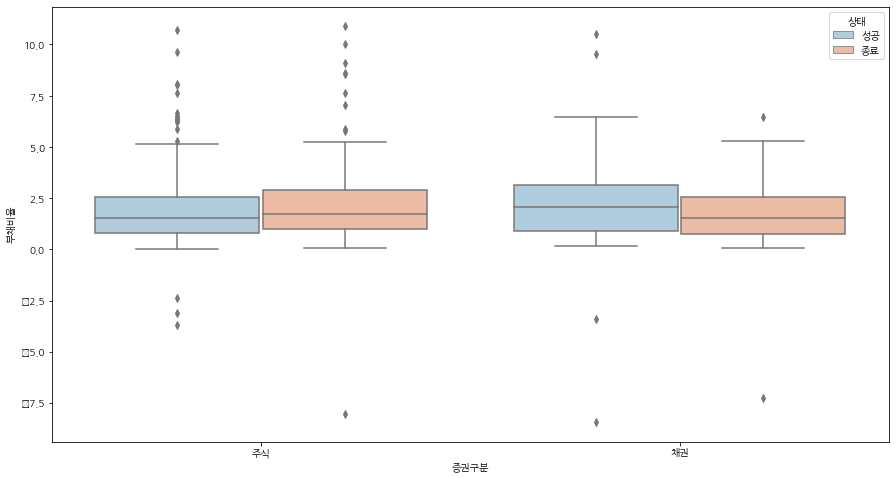

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x= '증권구분',y= '부채비율',hue = '상태',data = train2, palette = 'RdBu_r')

* 자기자본 비율에 관한 Box Plot

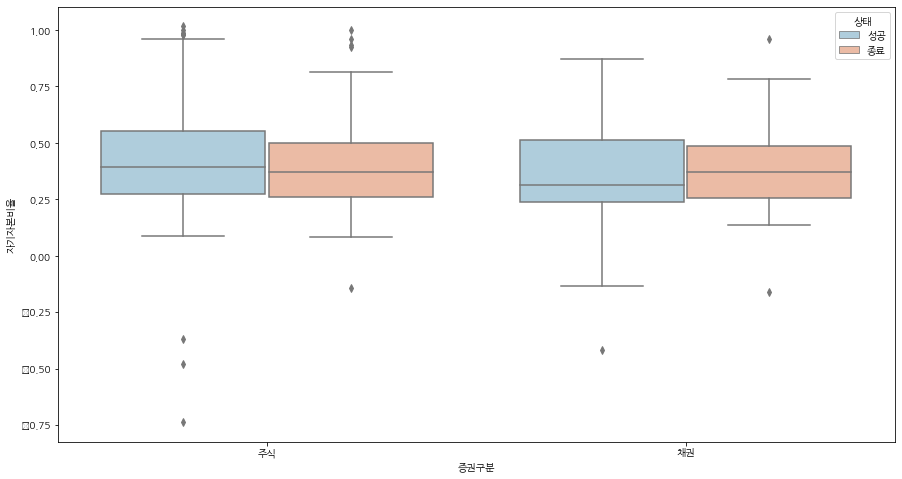

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x= '증권구분',y= '자기자본비율',hue = '상태',data = train2, palette = 'RdBu_r') 

* 자기자본 회전율에 관한 Box Plot

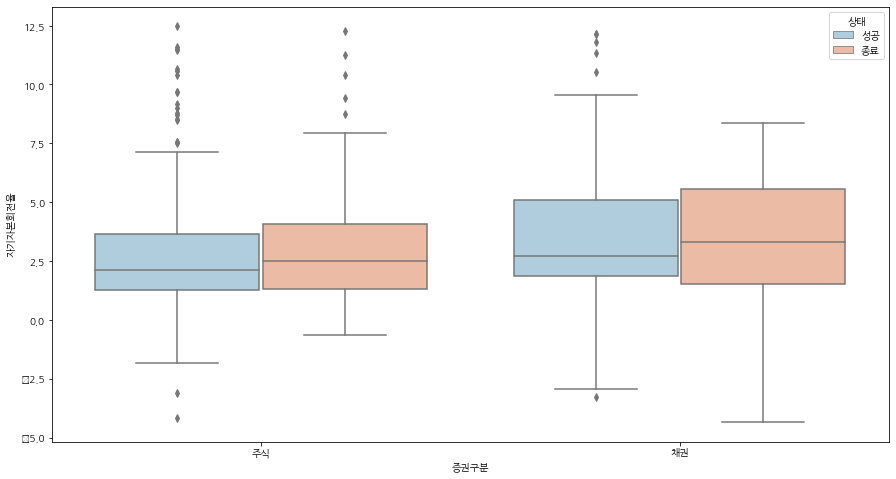

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x= '증권구분',y= '자기자본회전율',hue = '상태',data = train2, palette = 'RdBu_r') 

* 영업이익율에 관한 Box Plot

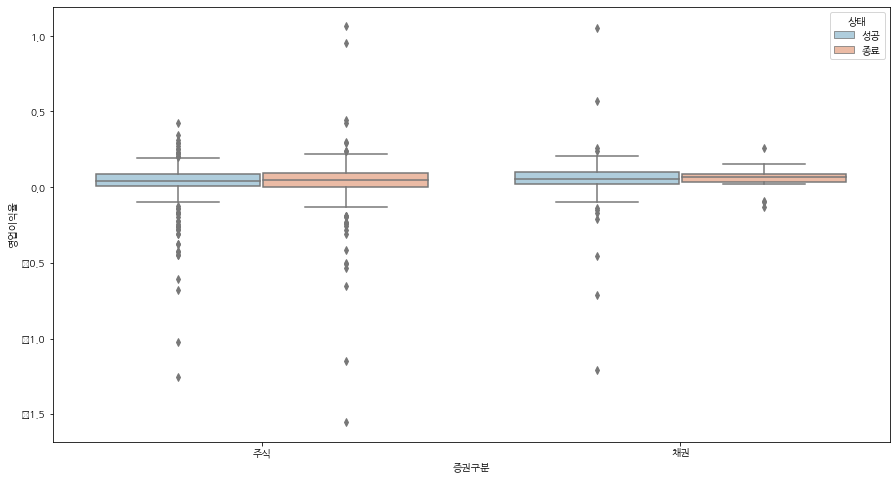

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x= '증권구분',y= '영업이익율',hue = '상태',data = train2, palette = 'RdBu_r')

* 순이익율 비율에 관한 Box Plot

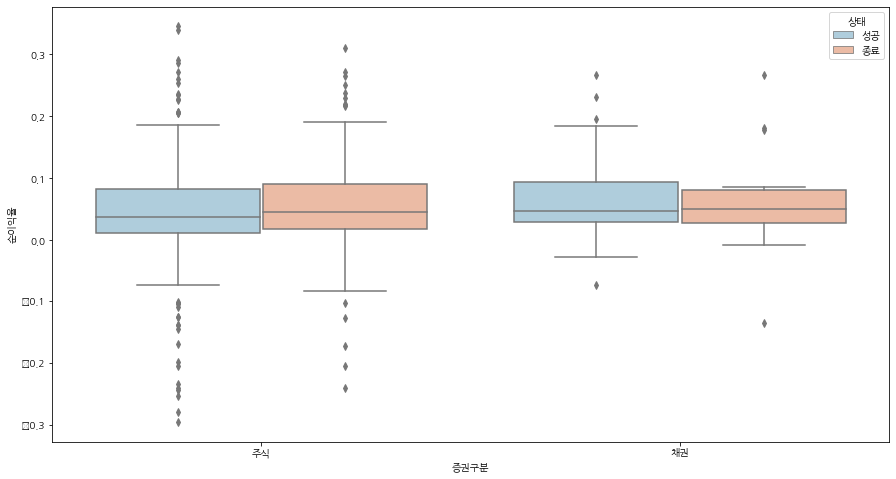

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x= '증권구분',y= '순이익율',hue = '상태',data = train2, palette = 'RdBu_r')

* ROE에 관한 Box Plot

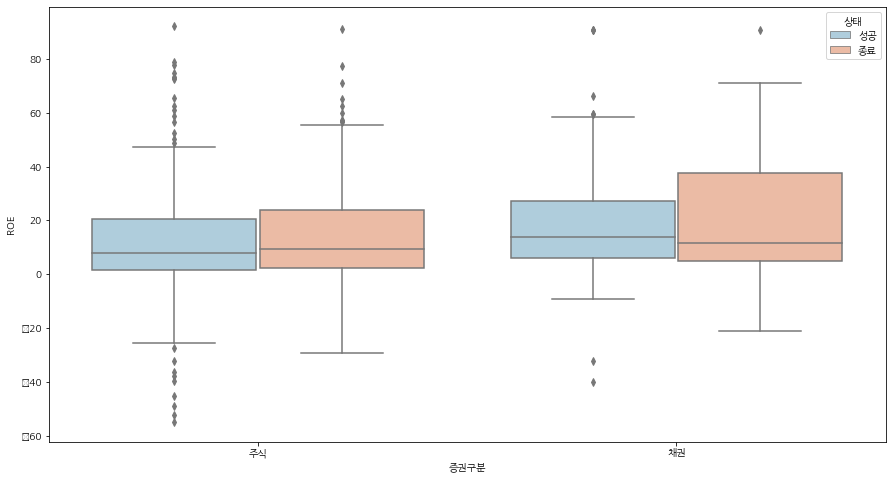

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x= '증권구분',y= 'ROE',hue = '상태',data = train2, palette = 'RdBu_r')

이를 볼때, 전체적인 기업의 투자 요소에 재무제표와 관련한 사항들을 본다고 파악하긴 어렵다는 결론은 얻었다.
> 즉 크라우드 펀딩에 모금하여 성공을하는 요소는 투자자가 기업의 "프로젝트"가 가장 중요하게 판단하는 요소이다.